In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [18]:
data = pd.read_csv('dava_sonuclari.csv')
data.head()

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
0,Criminal,221,39,18,24306,2,663160,3,1,29014,1,0
1,Civil,212,14,1,42444,3,252011,67,4,21591,1,0
2,Civil,47,6,19,21418,1,307309,66,6,25530,3,0
3,Commercial,358,13,9,45005,3,285111,63,1,28470,1,0
4,Criminal,33,17,17,36315,2,84229,38,2,38244,2,0


## VERİ SETİ İNCELEME : 
Case Type: Davanın türü (Criminal, Civil, Commercial)  
Case Duration (Days): Davanın süresi (gün olarak)  
Judge Experience (Years): Hakimin deneyim yılı  
Number of Witnesses: Tanık sayısı  
Legal Fees (USD): Hukuk masrafları (USD olarak)  
Plaintiff's Reputation: Davacının itibarı (1: Düşük, 2: Orta, 3: Yüksek)  
Defendant's Wealth (USD): Davalının serveti  
Number of Evidence Items: Delil sayısı  
Number of Legal Precedents: İlgili hukuki emsal sayısı  
Settlement Offered (USD): Teklif edilen uzlaşma miktarı  
Severity: Davanın ciddiyet derecesi (1: Düşük, 2: Orta, 3: Yüksek)  
Outcome: Davanın sonucu (0: Kaybetmek, 1: Kazanmak)  

## Görevler

### Veri Ön İşleme:
* Veri setini inceleyin ve eksik veya aykırı değerler olup olmadığını kontrol edin.  
* Gerektiğinde eksik verileri doldurun veya çıkarın.  
* Özelliklerin ölçeklendirilmesi gibi gerekli veri dönüşümlerini uygulayın. 

### Veri Setini Ayırma:
* Veri setini eğitim ve test setleri olarak ayırın (örn. %80 eğitim, %20 test).  

### Model Kurulumu:
* Karar ağacı modelini oluşturun ve eğitim verileri üzerinde eğitin.

### Modeli Değerlendirme:
* Test verilerini kullanarak modelin doğruluğunu değerlendirin.
* Doğruluk, precision, recall ve F1-score gibi performans metriklerini hesaplayın.

### Sonuçları Görselleştirme:
* Karar ağacının yapısını görselleştirin.
* Karar ağacının nasıl çalıştığını ve hangi özelliklerin davanın sonucunu belirlemede en etkili olduğunu açıklayın.

In [61]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Case Type                   200 non-null    int64  
 1   Case Duration (Days)        200 non-null    float64
 2   Judge Experience (Years)    200 non-null    float64
 3   Number of Witnesses         200 non-null    float64
 4   Legal Fees (USD)            200 non-null    float64
 5   Plaintiff's Reputation      200 non-null    int64  
 6   Defendant's Wealth (USD)    200 non-null    float64
 7   Number of Evidence Items    200 non-null    float64
 8   Number of Legal Precedents  200 non-null    float64
 9   Settlement Offered (USD)    200 non-null    float64
 10  Severity                    200 non-null    int64  
 11  Outcome                     200 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 18.9 KB


Case Type                     0
Case Duration (Days)          0
Judge Experience (Years)      0
Number of Witnesses           0
Legal Fees (USD)              0
Plaintiff's Reputation        0
Defendant's Wealth (USD)      0
Number of Evidence Items      0
Number of Legal Precedents    0
Settlement Offered (USD)      0
Severity                      0
Outcome                       0
dtype: int64

In [63]:
data.describe()

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,200.000000,200.0
mean,1.010000,-3.108624e-17,9.103829e-17,-1.332268e-17,5.107026e-17,1.905000,2.087219e-16,1.110223e-16,0.000000,-8.881784e-17,1.860000,0.0
std,0.782921,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,0.836345,1.002509e+00,1.002509e+00,1.002509,1.002509e+00,0.789631,0.0
min,0.000000,-1.846213e+00,-1.694028e+00,-1.685312e+00,-1.613387e+00,1.000000,-1.918833e+00,-1.593609e+00,-1.598017,-1.660556e+00,1.000000,0.0
25%,0.000000,-7.730510e-01,-8.306315e-01,-7.864791e-01,-8.497915e-01,1.000000,-8.237761e-01,-9.109672e-01,-0.943092,-8.278654e-01,1.000000,0.0
50%,1.000000,3.784166e-02,-1.151195e-02,1.123542e-01,3.938327e-02,2.000000,2.474306e-02,5.209633e-03,0.039296,-3.940540e-03,2.000000,0.0
75%,2.000000,8.915537e-01,8.961611e-01,8.763625e-01,9.148492e-01,3.000000,7.750588e-01,8.854579e-01,1.021683,8.296063e-01,2.250000,0.0
max,2.000000,1.707799e+00,1.671004e+00,1.550487e+00,1.756391e+00,3.000000,1.777736e+00,1.855528e+00,1.349146,1.757934e+00,3.000000,0.0


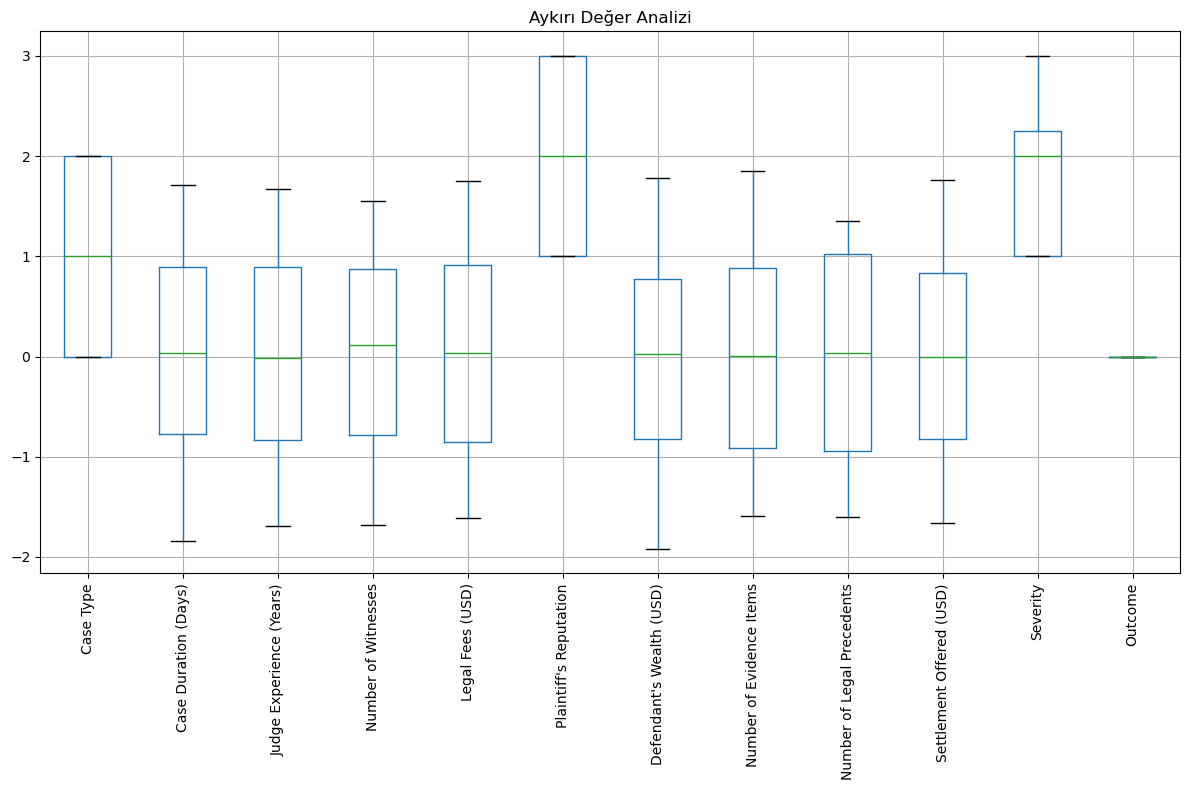

In [65]:
plt.figure(figsize=(12, 8))
data.boxplot()
plt.title('Aykırı Değer Analizi')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [67]:
data['Case Type'] = data['Case Type'].map({'Criminal': 0, 'Civil': 1, 'Commercial': 2})

scaler = StandardScaler()
numeric_features = ['Case Duration (Days)', 'Judge Experience (Years)', 'Number of Witnesses', 
                   'Legal Fees (USD)', 'Defendant\'s Wealth (USD)', 'Number of Evidence Items',
                   'Number of Legal Precedents', 'Settlement Offered (USD)']
data[numeric_features] = scaler.fit_transform(data[numeric_features])


In [69]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity
79,NaN,1.279605,0.962576,-0.786479,1.480033,3,0.267423,-0.336111,-0.288167,1.393191,3
197,NaN,-1.460838,-0.011512,-0.247179,1.329292,2,0.475846,-1.234324,-1.270555,-1.274241,2
38,NaN,0.177005,1.051130,0.651654,-1.365236,2,1.501325,0.562101,-0.943092,1.349704,1
24,NaN,-1.578591,-0.100065,-0.606712,-1.538693,1,0.891556,-0.695396,-0.615630,0.752323,2
122,NaN,-0.186960,-0.011512,-0.966246,0.617937,2,1.661326,-0.443897,0.694221,1.068716,3
...,...,...,...,...,...,...,...,...,...,...,...
106,NaN,-0.797137,-0.365726,0.471887,0.737462,1,1.473352,0.921386,-0.288167,-0.608855,1
14,NaN,0.198414,1.316790,1.190954,-1.010950,3,1.146586,-1.162467,-0.615630,-1.402921,1
92,NaN,0.787181,1.671004,-0.606712,-1.473327,3,0.767155,1.244743,-1.598017,1.477220,1
179,NaN,-1.632115,0.519809,-1.685312,0.909415,1,0.491384,-1.378038,-0.288167,-1.358339,3


In [71]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [73]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

f1

0.0

In [75]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        40\n\n    accuracy                           1.00        40\n   macro avg       1.00      1.00      1.00        40\nweighted avg       1.00      1.00      1.00        40\n'

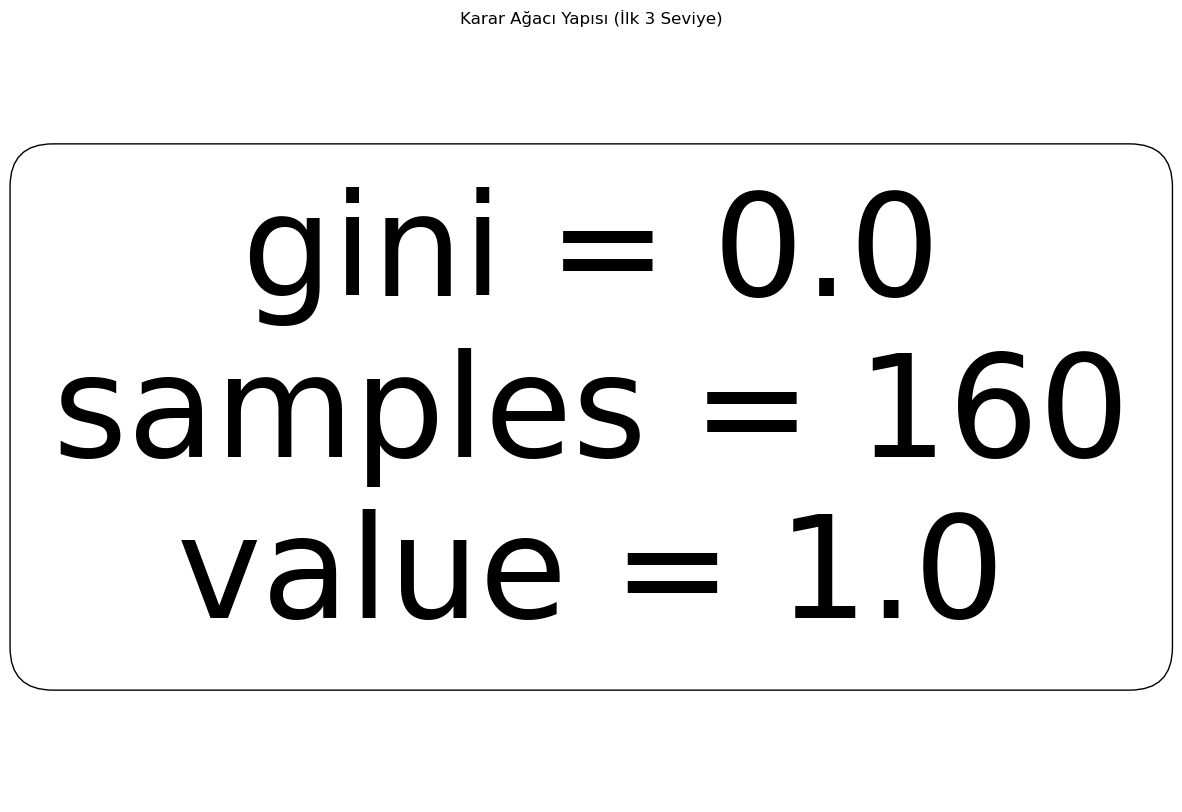

In [85]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=list(X.columns), 
          class_names=['Kaybetmek', 'Kazanmak'], rounded=True, max_depth=3)
plt.title('Karar Ağacı Yapısı (İlk 3 Seviye)')
plt.show()

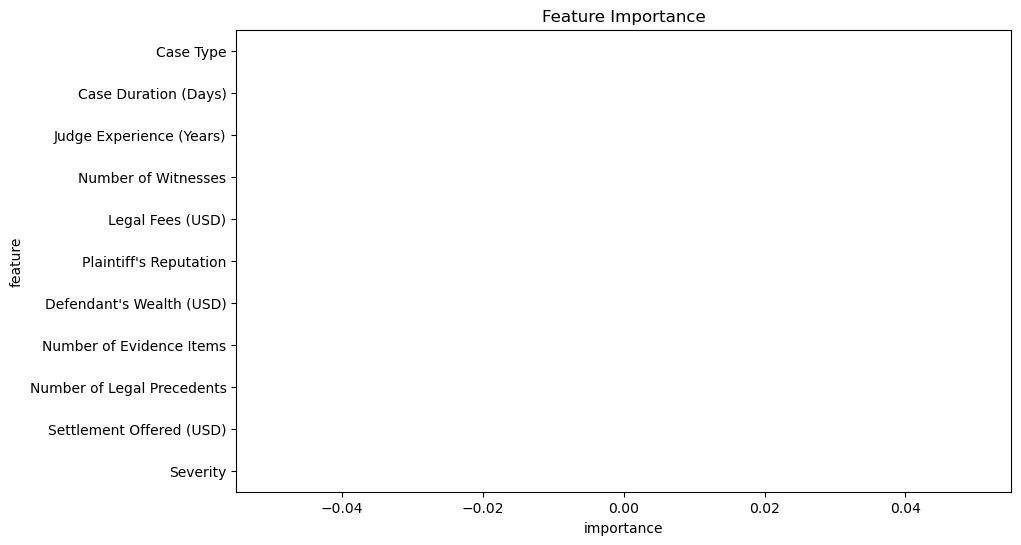

In [89]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()